# 비지도 학습 : 차원축소, 군집화

### [1] 차원 축소
### - PCA(Principal Component Analysis) : 주성분 분석
- 차원 축소 알고리즘, 비지도 학습
- 이미지 데이터의 차원 축소, 자연언어 텍스트 의미 분석
- 원본 데이터의 정보 유실이 최소화 되도록 축소시킨다
- 데이터의 변동성(Variance)을 기반으로 축울 생성하여 축소하는 알고리즘이다  
- 이미지 분류등의 분류 수행시 과적합을 방지하여 예측 성능 향상



In [1]:
# PCA Exam
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')   # warning 메세지 출력을 하지 않도록설정

# iris 데이터를 가져오기
iris = load_iris()
type(iris) 
type(iris.data)    # X     
type(iris.target)  # Y     

iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df  


columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data,columns=columns)

iris_df['target'] = iris.target
iris_df  # (150, 5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


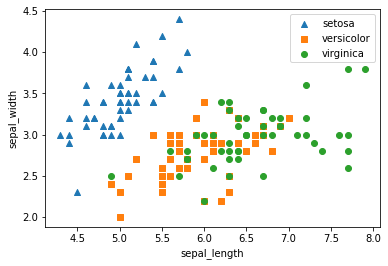

In [2]:
# 원본 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df[iris_df['target']==i]['sepal_length']
    y = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [5]:
# 데이터를 표준화하여 정규분포로 전처리
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(iris_df)

# PCA 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape) 

pca_columns = ['pca_component_1','pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca,columns=pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca

(150, 2)


,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


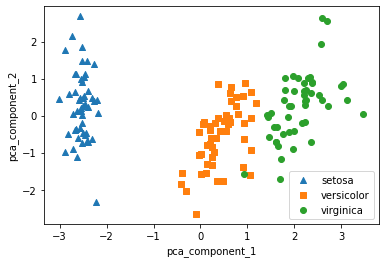

In [6]:
# PCA 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [7]:
print(pca.explained_variance_ratio_)
# 'pca_component_1'의 변동성 비율 : 0.76740358 
# 'pca_component_2'의 변동성 비율 : 0.18282727

[0.76740358 0.18282727]


In [8]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156,n_estimators=100)

# 원본 데이터로 교차 검증
scores = cross_val_score(rcf,iris.data,iris.target,
                         scoring='accuracy', cv=3)
print(scores,scores.mean())

[0.98 0.94 0.96] 0.96


In [9]:
# PCA 데이터로 교차 검증
# pca_x = iris_df_pca[['pca_component_1','pca_component_2']]
pca_x = iris_df_pca.iloc[:,:-1]
scores_pca = cross_val_score(rcf,pca_x,iris.target,
                         scoring='accuracy', cv=3)
print('pca score:',scores_pca,scores_pca.mean())


pca score: [0.98 0.98 1.  ] 0.9866666666666667


### [2]  군집화(Clustering,클러스터링)
#### 비지도 학습 알고리즘

- 고객이나 마켓 및 사회 경제 활동 세분화(Segmentation)
- 영상 분야 : 이미지 검출, 세분화, 트래킹
- 이상 검출(Abnormally Detection)

#### : K-Means(K-평균) , Mean Shift(평균이동), 친근도전파


### K-Means(K-평균) 
- N개의 표본을 K개의 군집으로 나눈다
- 군집화중 가장 많이 사용, 쉽고 간결하다, 대용량 데이터 처리 가능
- 속성(변수)의 갯수가 너무 많으면 정확도가 떨어져서 PCA로 차원 감소가 필요
- 몇개의 군집을 선택해야할지 어렵다
- 이상치 데이터에 취약: 이상치로 인해 중심점이 잘못 설정 될수 있다

In [10]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
columns = ['sepal_length',
           'sepal_width',
           'petal_length',
           'petal_width']
irisDF = pd.DataFrame(iris.data,columns=columns)
irisDF.shape # (150, 4)
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [11]:
# KMeans 객체를 생성하고 군집화 수행

# sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10,
# max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, 
# random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,
                random_state=0)
# 'k-means++' : centroid 를 random으로 잡지 않고 초기화하는 알고리즘을 사용
#  max_iter : 최대 반복 횟수, 최대값 이내에서 모든 데이터의 중심점 이동이 없으면 종료한다

kmeans.fit(irisDF)

print(kmeans)
type(kmeans)  #sklearn.cluster.k_means_.KMeans

KMeans(n_clusters=3, random_state=0)


sklearn.cluster._kmeans.KMeans

In [12]:
print(kmeans.labels_)          # 각 데이터트가 속한 군집 중심점의 레이블
print(kmeans.labels_.shape)    # (150,)
print(kmeans.cluster_centers_) # 중심점 실제 좌표값
print(kmeans.cluster_centers_.shape) # (3,4)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
(150,)
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
(3, 4)


In [13]:
# 예측
kmeans.predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
pd.set_option('display.max_rows',500)
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [15]:
irisDF['cluster'] = kmeans.labels_  # 군집화된 결과를 컬럼 추가
irisDF['target'] = iris.target
irisDF
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)
# target이 0인 데이터는 1번 군집에 50개  , 'setoasa'는  완벽히 분리 
# target이 1인 데이터는 0번 군집에 48개,2번 군집에 2개
# target이 2인 데이터는 0번 군집에 4개, 2번 군집에 36개로 생성

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [16]:
# KMeans기초 예제 : scikit-learn 도움말의 Example
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2],
              [1, 4], 
              [1, 0],
              [10, 2],
              [10, 4],
              [10, 0]])  # (6,2)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

print(kmeans.labels_)                    # array([1, 1, 1, 0, 0, 0], dtype=int32)

print(kmeans.predict([[0, 0],
                      [12, 3]])) # (2,2)
# array([1, 0], dtype=int32)

print(kmeans.cluster_centers_)
# array([[10.,  2.],
#        [ 1.,  2.]])

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


In [17]:
# iris 군집화 결과를 시각화하기

from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 2차원 평면에 출력하기 위하여 2차원으로 축소
pca_transformed = pca.fit_transform(iris.data)
pca_transformed

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755
5,5.4,3.9,1.7,0.4,1,0,-2.280860,0.741330
6,4.6,3.4,1.4,0.3,1,0,-2.820538,-0.089461
7,5.0,3.4,1.5,0.2,1,0,-2.626145,0.163385
8,4.4,2.9,1.4,0.2,1,0,-2.886383,-0.578312
9,4.9,3.1,1.5,0.1,1,0,-2.672756,-0.113774


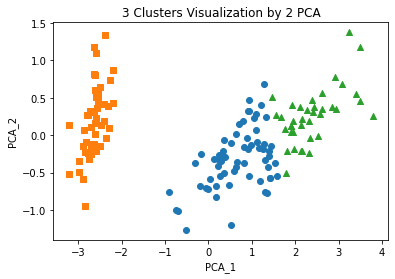

In [18]:
marker0_ind = irisDF[irisDF['cluster'] == 0].index  # 0번 군집의 행번호
marker1_ind = irisDF[irisDF['cluster'] == 1].index  # 1번 군집의 행번호
marker2_ind = irisDF[irisDF['cluster'] == 2].index  # 2번 군집의 행번호

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'] , 
            y=irisDF.loc[marker0_ind,'pca_y'], marker='o') # 0번 군집

plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'] , 
            y=irisDF.loc[marker1_ind,'pca_y'], marker='s') # 1번  군집

plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'] , 
            y=irisDF.loc[marker2_ind,'pca_y'], marker='^') # 2번 군집

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('3 Clusters Visualization by 2 PCA')
plt.show()


### 군집 평가(Cluster Evaluation)

### 실루엣(Silhouette) 분석
### 실루엣 계수(Silhouette Coefficient)
#### : 군집화의 지표, 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타낸다,  높을수로 좋음

In [19]:
from sklearn.metrics import silhouette_samples,silhouette_score

# silhouette_samples() : 모든 개별데이터의 실루엣 계수를 구함
score_samples = silhouette_samples(iris.data,irisDF['cluster'])
# print(score_samples)   # (150,)

irisDF['silhouette_coeff'] = score_samples
irisDF

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,0.829315
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,0.805014
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,0.849302
5,5.4,3.9,1.7,0.4,1,0,-2.280860,0.741330,0.748280
6,4.6,3.4,1.4,0.3,1,0,-2.820538,-0.089461,0.821651
7,5.0,3.4,1.5,0.2,1,0,-2.626145,0.163385,0.853905
8,4.4,2.9,1.4,0.2,1,0,-2.886383,-0.578312,0.752150
9,4.9,3.1,1.5,0.1,1,0,-2.672756,-0.113774,0.825294


In [20]:
# silhouette_score( ): 전체 데이터의 평균 실루엣 계수를 구함
average_score = silhouette_score(iris.data,irisDF['cluster'])
print('iris K-means 평균 실루엣 계수:',average_score) # 0.55

iris K-means 평균 실루엣 계수: 0.5528190123564097


cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

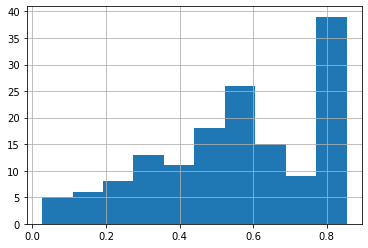

In [21]:
irisDF['silhouette_coeff'].hist()
irisDF.groupby('cluster')['silhouette_coeff'].mean()
# 1    0.798140  <-- 'setosa'

In [22]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm  # color map
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs(axes 객체) 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    # print('axs:',axs)
          
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster) # cluster별 색깔 구별
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

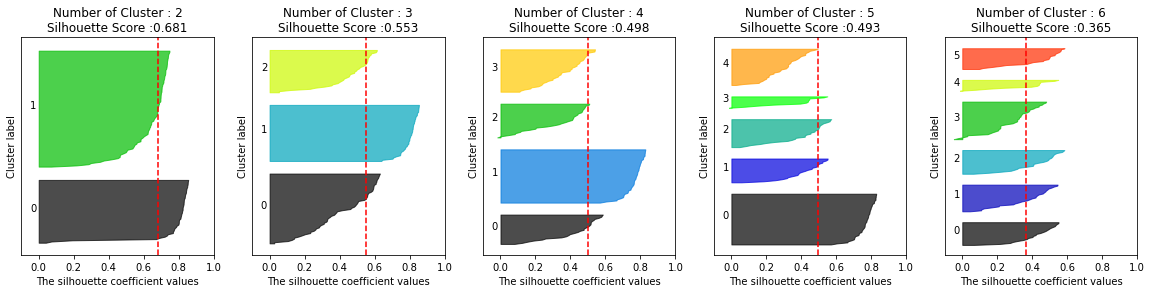

In [23]:
visualize_silhouette([2,3,4,5,6],iris.data)
# 군집화가 2개 일 때 실루엣 계수가 가장 크다